## PLQE Data Analysis - Template

According to de Mello's paper: https://doi.org/10.1002/adma.19970090308

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.integrate import trapezoid

In [109]:
sample = 'TC_May23'
modes = ['direct', 'empty', 'indirect']
#Check files are in the same order as the modes above for labelling later
files = [f for f in os.listdir() if sample in f and f.endswith('.csv')]
print(files)
datas = [np.loadtxt(f, delimiter=',') for f in files]

['traing_TC_May23_Film_direct.csv', 'traing_TC_May23_Film_empty.csv', 'traing_TC_May23_Film_indirect.csv']


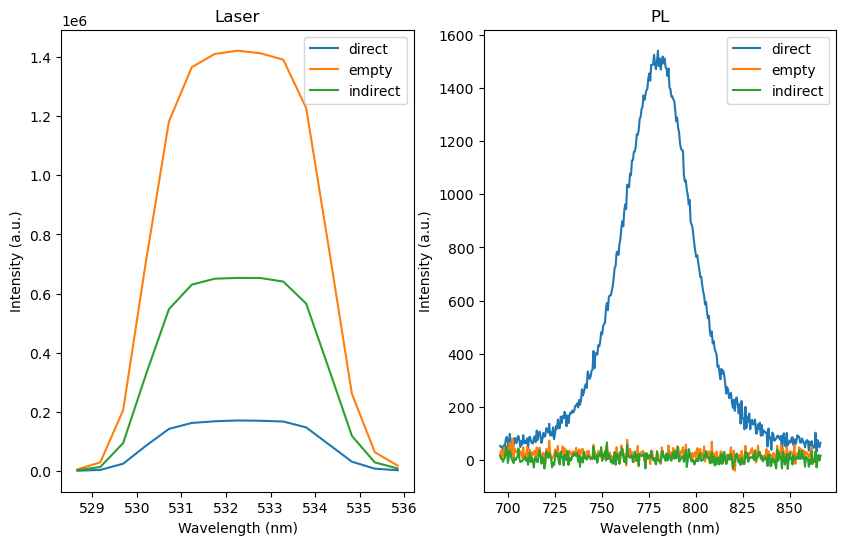

In [116]:
#Find the wavelength range for the laser and PL
wlmin_laser = 294
wlmax_laser = -715
wlmin_pl = 620
wlmax_pl = -70
#Plot the data
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(10,6))
for data,m in zip(datas,modes):
    ax1.plot(data[wlmin_laser:wlmax_laser,0], data[wlmin_laser:wlmax_laser,1], label=m)
    ax2.plot(data[wlmin_pl:wlmax_pl,0], data[wlmin_pl:wlmax_pl,1], label=m)
    ax1.set_xlabel('Wavelength (nm)')
    ax1.set_ylabel('Intensity (a.u.)')
    ax1.set_title('Laser')
    ax2.set_xlabel('Wavelength (nm)')
    ax2.set_ylabel('Intensity (a.u.)')
    ax2.set_title('PL')
    ax1.legend()
    ax2.legend()
    

Absorption of laser is given by:\
\
A = ( 1 - $ \frac{L_{{direct}}}{L_{{indirect}}} $ )

In [111]:
L_direct = trapezoid(datas[0][wlmin_laser:wlmax_laser,1], datas[0][wlmin_laser:wlmax_laser,0]) #Area under laser curve for direct mode
L_indirect = trapezoid(datas[1][wlmin_laser:wlmax_laser,1], datas[1][wlmin_laser:wlmax_laser,0]) #Area under laser curve for indirect mode
print("Direct: {:.1e}".format(L_direct))
print("Indirect: {:.1e}".format(L_indirect))

#Calculate the absorption
A = 1 - (L_direct/L_indirect) 
print(f'A = {A:.2}')

Direct: 7.1e+05
Indirect: 2.7e+06
A = 0.74


Efficiency is given by:\
\
$\eta$ = $\frac{P_{{direct}}-(1-A)P_{{indirect}}}{L_{{empty}}A}$

In [118]:
P_direct = trapezoid(datas[0][wlmin_pl:wlmax_pl,1], datas[0][wlmin_pl:wlmax_pl,0]) #Area under PL curve for direct mode
P_indirect = trapezoid(datas[1][wlmin_pl:wlmax_pl,1], datas[1][wlmin_pl:wlmax_pl,0]) #Area under PL curve for indirect mode
L_empty = trapezoid(datas[1][wlmin_laser:wlmax_laser,1], datas[1][wlmin_laser:wlmax_laser,0]) #Area under laser curve for empty mode

#Calcualte Efficiency
eta = (P_direct - (1-A)*P_indirect)/(L_empty * A)
print(f'efficiency = {eta:.2%}')

efficiency = 1.79%
